In [1]:
import pyamd
from pyamd.analysis import centrality
from pyamd.utilities import root6, style
from pyamd.e15190 import microball
import inspect
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
style.set_matplotlib_style(mpl)

Welcome to JupyROOT 6.26/06


In [2]:
reaction= 'Ca48Ni64E140'
skyrme = 'SkM'
impact_parameter = (0.,10.)
mode = '3'
spectra = centrality.Multiplicity_ImpactParameter(
            reaction=reaction, skyrme=skyrme, impact_parameter=impact_parameter, mode=mode)

['h2_multi_b_mode3']


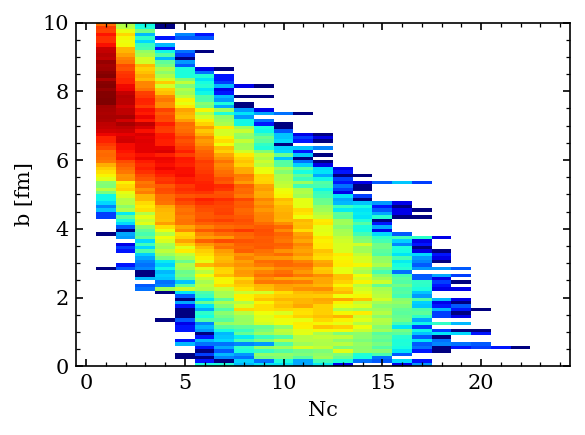

In [3]:
fig, ax = plt.subplots()
spectra.plot2d(ax, norm=LogNorm())
ax.set(xlabel='Nc', ylabel='b [fm]')
plt.tight_layout()

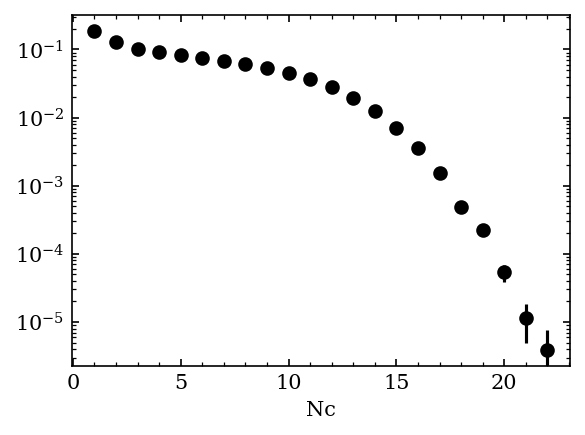

In [4]:
fig, ax = plt.subplots()
spectra.plot_multiplicity(ax, fmt='ko')
ax.set(xlabel='Nc', yscale='log')
plt.tight_layout()

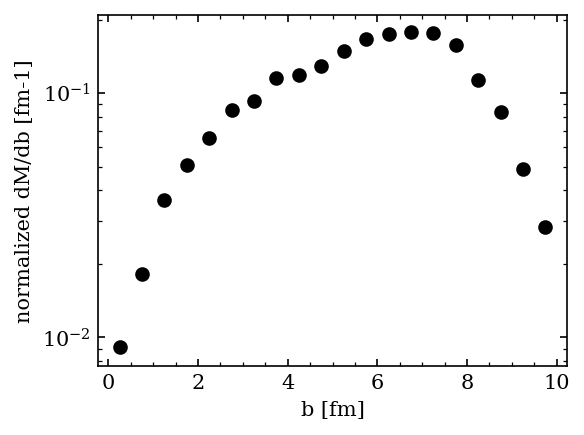

In [5]:
fig, ax = plt.subplots()
spectra.plot_impact_parameter(ax, bins=20, fmt='ko')
ax.set(xlabel='b [fm]', ylabel='normalized dM/db [fm-1]', yscale='log')
plt.tight_layout()

 **********
 **    1 **SET ERR           1
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 norm         6.28000e+00  1.00000e-01     no limits
     2 b0           9.00000e+00  1.00000e-01     no limits
     3 db           1.00000e-01  1.00000e-02     no limits
 **********
 **    2 **SET PRINT           0
 **********
 **********
 **    3 **MIGRAD         500         0.1
 **********
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.
 FCN=442.373 FROM MIGRAD    STATUS=CONVERGED     114 CALLS         115 TOTAL
                     EDM=2.04778e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  norm         9.14201e+00   2.36472e-02   1.84082e-04  -1.06531e-02
   2  b0           8.25308e+00   7.47975e-03   4.96763e-05  -1.23932e-02
   3  db           6.68723e-01  

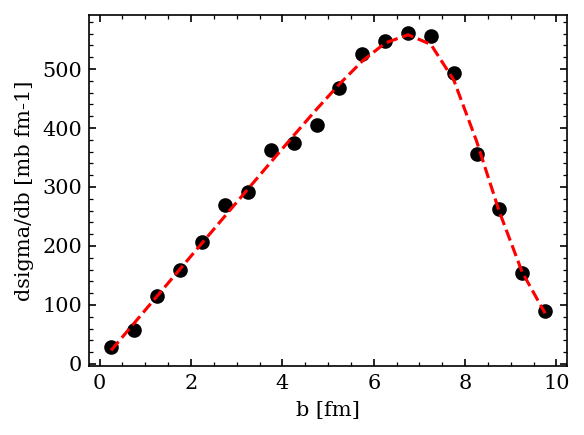

In [6]:
fig, ax = plt.subplots()
spectra.plot_dsigma_db(ax, unit='mb', fmt='ko')
spectra.plot_fitted_dsigma_db(ax, unit='mb', fmt='r--')
ax.set(xlabel='b [fm]', ylabel='dsigma/db [mb fm-1]')
plt.tight_layout()

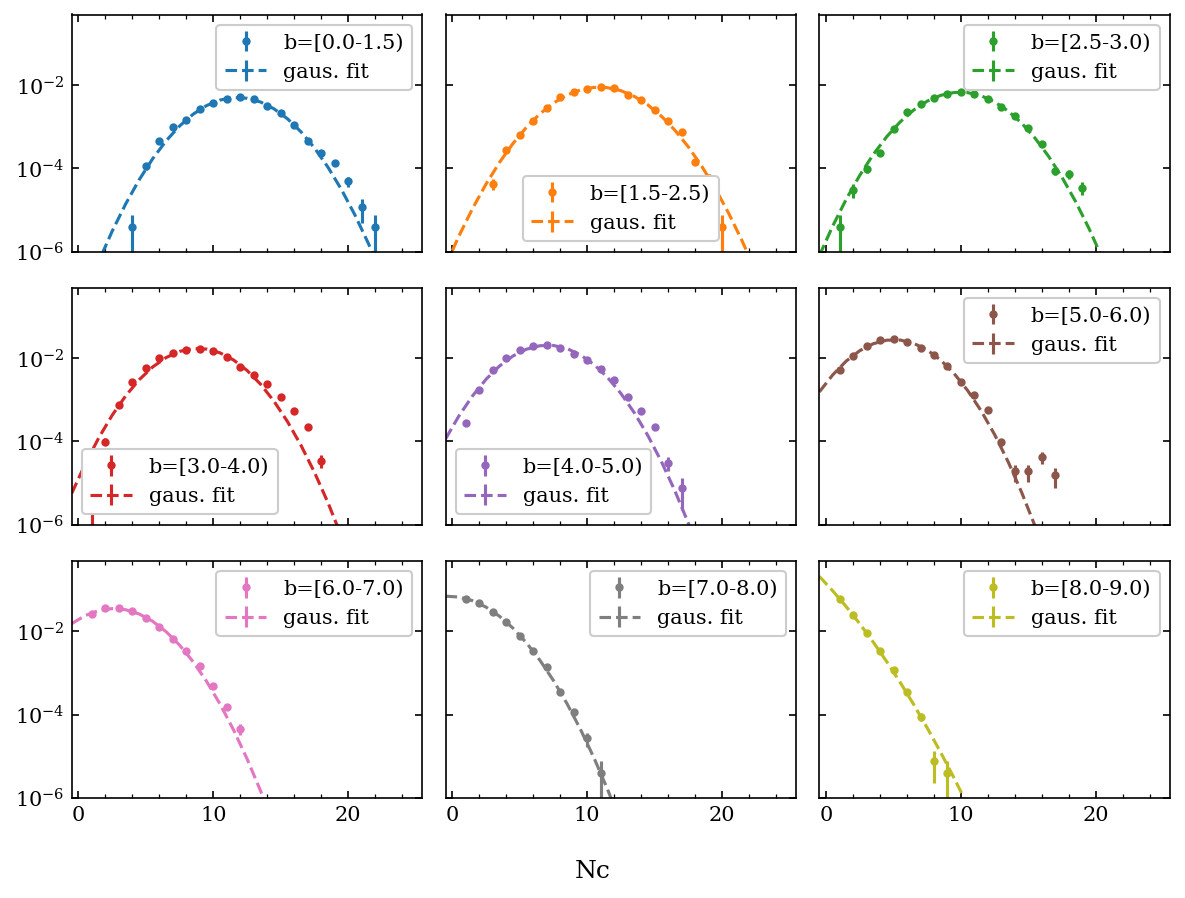

In [7]:
colors = plt.rcParams["axes.prop_cycle"]()
ranges = np.array([0., 1.5, 2.5, 3., 4., 5., 6., 7., 8., 9.])
ranges = list(zip(ranges[:-1], ranges[1:]-0.01))
fig, axes = plt.subplots(3, 3, figsize=(
    8, 6), sharex=True, sharey=True)
for range, ax in zip(ranges, axes.flatten()):

    c = next(colors)["color"]
    spectra.plot_multiplicity(
        ax, cut=range, label=f'b=[{range[0]:.1f}-{range[1]:.1f})', color=c)
    spectra.plot_fitted_multiplicity(
        ax, cut=range, label='gaus. fit', color=c, fmt='--')
    ax.set(xlim=(-0.5, 25.5), ylim=(1e-6, 5e-1), yscale='log')
    ax.legend()
fig.supxlabel('Nc')
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()


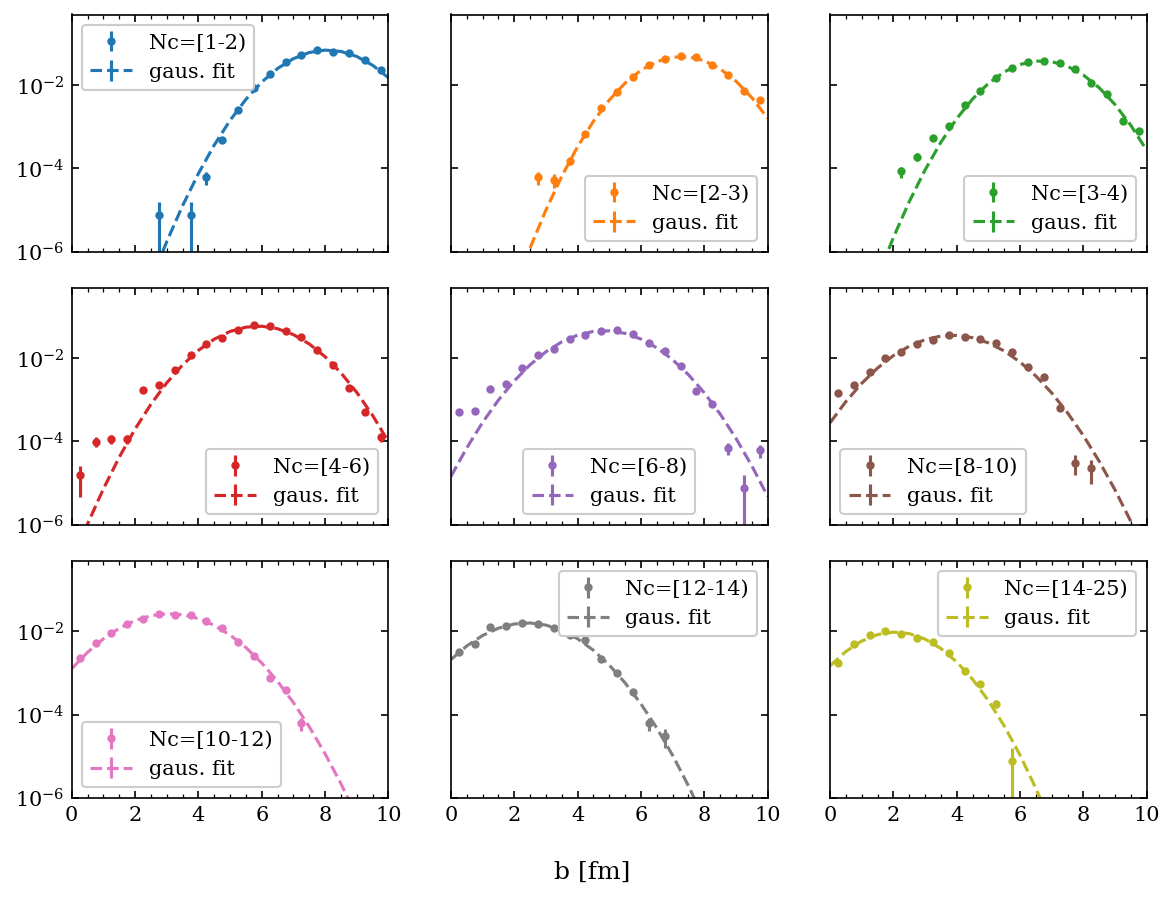

In [8]:
colors = plt.rcParams["axes.prop_cycle"]()
ranges = np.array([1, 2, 3, 4, 6, 8, 10, 12, 14, 25])
ranges = list(zip(ranges[:-1], ranges[1:]-0.01))
fig, axes = plt.subplots(3, 3, figsize=(
    8, 6), sharex=True, sharey=True)
for range, ax in zip(ranges, axes.flatten()):
    c = next(colors)["color"]
    spectra.plot_impact_parameter(
        ax, cut=range, label=f'Nc=[{range[0]:.0f}-{range[1]:.0f})', color=c, fmt='.')
    spectra.plot_fitted_impact_parameter(
        ax, cut=range, label='gaus. fit', color=c, fmt='--')
    ax.set(xlim=(0., 10.), ylim=(1e-6, 5e-1), yscale='log')
    ax.legend()
fig.supxlabel('b [fm]')
plt.tight_layout()


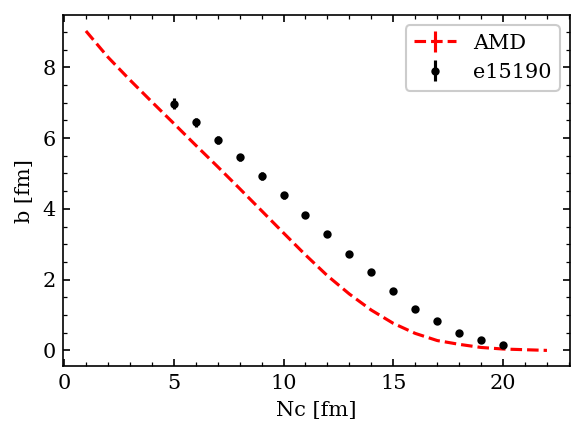

In [9]:
fig, ax = plt.subplots()
spectra.plot_mapping(ax, fmt='r--', label='AMD')
uball = microball.microball()
uball.plot_impact_parameter_mapping(
    ax, path=f'{str(pyamd.PROJECT_DIR)}/database/microball/bimp_mapping/{reaction}.dat', fmt='k.', label="e15190")
ax.set(xlabel='Nc [fm]', ylabel='b [fm]')
ax.legend()
plt.tight_layout()
